In [ ]:
# This file to training the model and gain high acc

# Capstone Project B21 - CAP0087
# Reza Syahputra - M0060625 - Machine Learning - Brawijaya University
# Rahmi Peacefullyani - M0060565 - Machine Learning - Brawijaya University

In [5]:
# Import Package
import time
import os
import cv2
import math
# import pafy
import random
import numpy as np
import datetime as dt
import tensorflow as tf
# from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [6]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

['Step_1', 'Step_2_Left', 'Step_2_Right', 'Step_3', 'Step_4_Left', 'Step_4_Right', 'Step_5_Left', 'Step_5_Right', 'Step_6_Left', 'Step_6_Right', 'Step_7_Left', 'Step_7_Right']


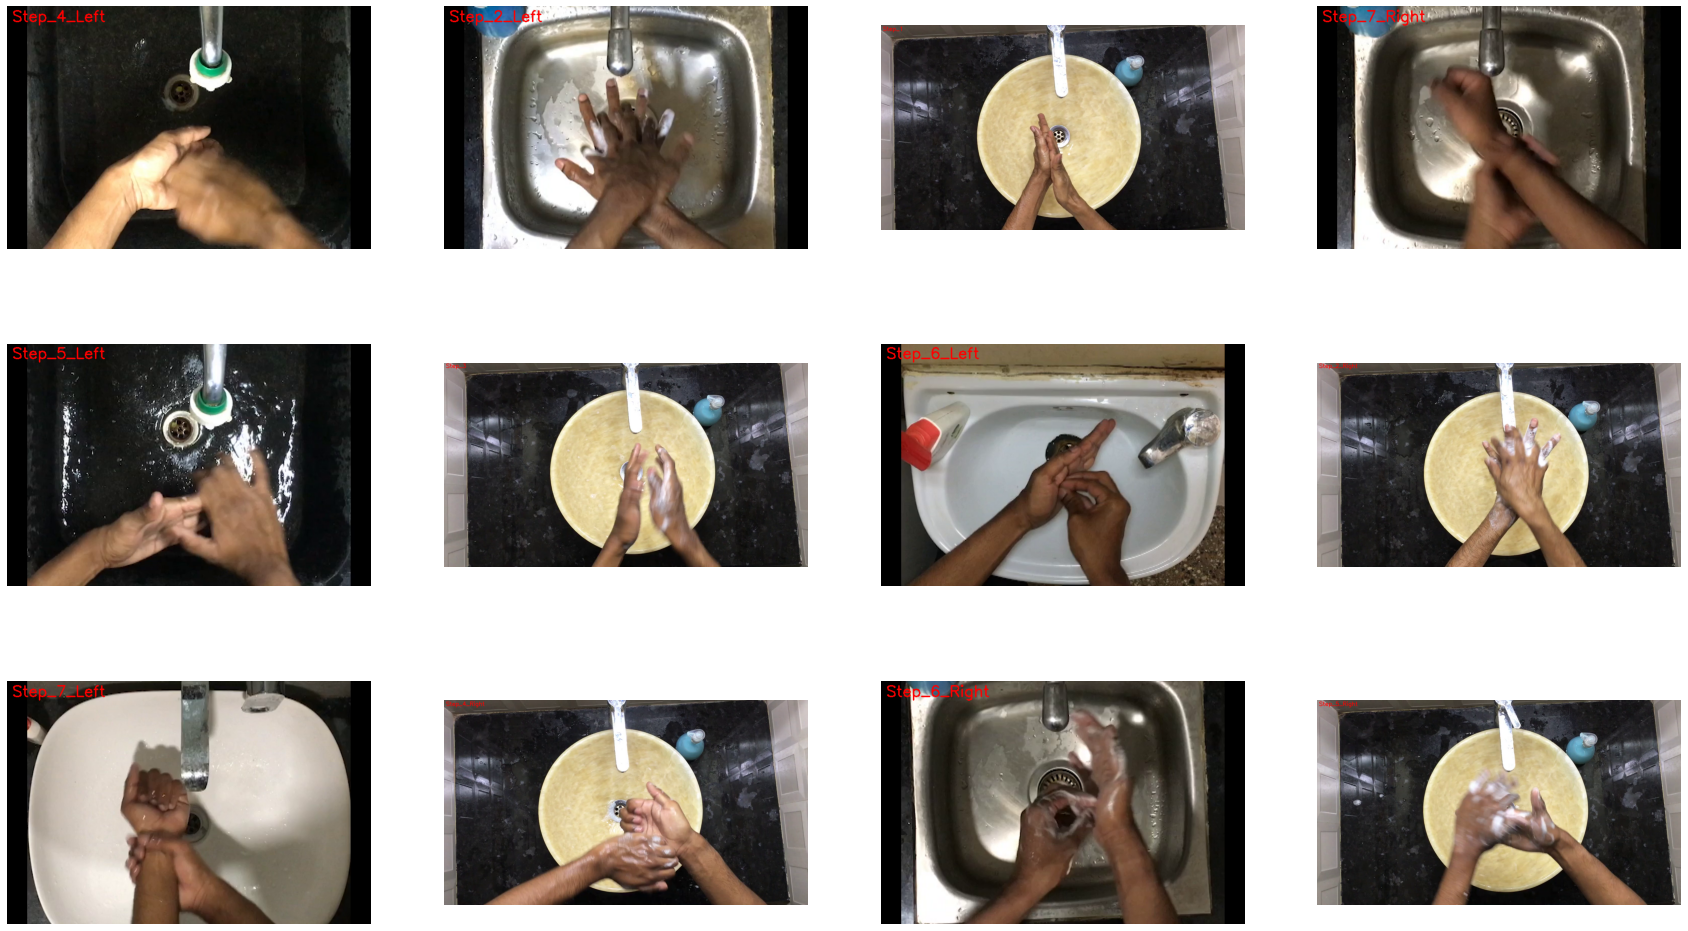

In [7]:
# Create a Matplotlib figure
plt.figure(figsize = (30, 30))

# Get Names of all classes in HandWashDataset
all_classes_names = os.listdir('../input/hand-wash-dataset/HandWashDataset/HandWashDataset')
all_classes_names.sort()
all_classes_names.pop(0)
all_classes_names.pop(0)
print(all_classes_names)

# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)), 12)

# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):
    selected_class_Name = all_classes_names[random_index]
    video_files_names_list = os.listdir(f'../input/hand-wash-dataset/HandWashDataset/HandWashDataset/{selected_class_Name}')
    selected_video_file_name = random.choice(video_files_names_list)

    video_reader = cv2.VideoCapture(f'../input/hand-wash-dataset/HandWashDataset/HandWashDataset/{selected_class_Name}/{selected_video_file_name}')
    _, bgr_frame = video_reader.read()
    video_reader.release()

    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

In [8]:
# Define atribut, dataset and class
image_height, image_width = 64, 64
max_images_per_class = 6000

dataset_directory = "HandWashDataset"
classes_list = ['Step_1', 'Step_2_Left', 'Step_2_Right', 'Step_3', 
                'Step_4_Left', 'Step_4_Right', 'Step_5_Left', 'Step_5_Right', 
                'Step_6_Left', 'Step_6_Right', 'Step_7_Left', 'Step_7_Right']

model_output_size = len(classes_list)

In [9]:
# Load numpy array
features = np.load('../input/handwashfeatures/features.npz')
features  = features['arr_0']

labels = np.load('../input/handwashfeatures/labels.npy')

In [10]:
# Convert labels
one_hot_encoded_labels = to_categorical(labels) 

In [11]:
# Split Dataset into train and test
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.2, shuffle = True, random_state = seed_constant)

In [14]:
del features

NameError: name 'features' is not defined

In [13]:
# Function that will construct the model
def create_model():
    model = Sequential()
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(model_output_size, activation = 'softmax'))

    model.summary()

    return model


model = create_model()

print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1

In [15]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'min', restore_best_weights = True)
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

model_training_history = model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/50
11520/11520 [==============================] - 644s 56ms/step - loss: 2.0549 - accuracy: 0.2796 - val_loss: 1.8722 - val_accuracy: 0.4635
Epoch 2/50
11520/11520 [==============================] - 656s 57ms/step - loss: 0.7060 - accuracy: 0.7624 - val_loss: 1.5992 - val_accuracy: 0.6214
Epoch 3/50
11520/11520 [==============================] - 642s 56ms/step - loss: 0.4859 - accuracy: 0.8366 - val_loss: 0.7850 - val_accuracy: 0.7866
Epoch 4/50
11520/11520 [==============================] - 645s 56ms/step - loss: 0.3759 - accuracy: 0.8781 - val_loss: 0.3685 - val_accuracy: 0.8940
Epoch 5/50
11520/11520 [==============================] - 640s 56ms/step - loss: 0.3294 - accuracy: 0.8953 - val_loss: 0.2824 - val_accuracy: 0.9111
Epoch 6/50
11520/11520 [==============================] - 657s 57ms/step - loss: 0.2959 - accuracy: 0.9065 - val_loss: 1.0142 - val_accuracy: 0.7698
Epoch 7/50
11520/11520 [==============================] - 656s 57ms/step - loss: 0.2592 - accuracy: 0.9191

In [18]:
# Evaluation
model_evaluation_history = model.evaluate(features_test, labels_test)

450/450 [==============================] - 40s 89ms/step - loss: 0.2016 - accuracy: 0.9457


In [19]:
# Save model
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
model_name = f'./Model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'


model.save(model_name)

In [20]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    epochs = range(len(metric_value_1))


    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    plt.title(str(plot_name))
    plt.legend()

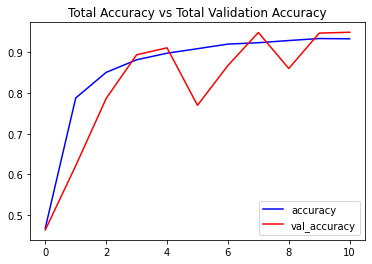

In [21]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [87]:
# Creating The Output directories if it does not exist
output_directory = './test'
os.makedirs(output_directory, exist_ok = True)

# Downloading a YouTube Video
# video_title = download_youtube_videos('https://www.youtube.com/watch?v=OFf_2XtUg_w', output_directory)
# video_title = download_youtube_videos('../input/hand-wash-dataset/HandWashDataset/HandWashDataset/Step_4_left', 'HandWash_001_A_05_G_01.mp4', output_directory)

# Getting the YouTube Video's path you just downloaded
input_video_file_path = f'{output_directory}/{video_title}.mp4'

NameError: name 'pafy' is not defined

In [79]:
def predict_on_live_video(video_file_path, output_file_path, window_size):
    predicted_labels_probabilities_deque = deque(maxlen = window_size)
    video_reader = cv2.VideoCapture(video_file_path)

    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    print("1")
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 24, (original_video_width, original_video_height))

    while True: 
        status, frame = video_reader.read() 
#         print('2')

        if not status:
            print('break')
            break

        resized_frame = cv2.resize(frame, (image_height, image_width))
        normalized_frame = resized_frame / 255

        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]
        predicted_labels_probabilities_deque.append(predicted_labels_probabilities)

        if len(predicted_labels_probabilities_deque) == window_size:
#             print('3')

            predicted_labels_probabilities_np = np.array(predicted_labels_probabilities_deque)
            predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)
            predicted_label = np.argmax(predicted_labels_probabilities_averaged)
            predicted_class_name = classes_list[predicted_label]
            cv2.putText(frame, predicted_class_name, (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2)
#             cv2.putText(frame, "predicted_class_name", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 25, (0, 0, 255), 2)

        video_writer.write(frame)


        # cv2.imshow('Predicted Frames', frame)

        # key_pressed = cv2.waitKey(10)

        # if key_pressed == ord('q'):
        #     break

    # cv2.destroyAllWindows()

    video_reader.release()
    video_writer.release()

In [89]:
# Setting sthe Window Size which will be used by the Rolling Average Proces
window_size = 1

# Constructing The Output YouTube Video Path
output_video_file_path = f'{output_directory}/{video_title}' #-Output-WSize {window_size}.mp4'

# Calling the predict_on_live_video method to start the Prediction.
# predict_on_live_video(input_video_file_path, output_video_file_path, window_size)
predict_on_live_video('../input/uji-coba-step-1-lagi/WhatsApp Video 2021-05-22 at 09.57.12.mp4', output_video_file_path, window_size)

# Play Video File in the Notebook
VideoFileClip(output_video_file_path).ipython_display(width = 700)

1


t:   0%|          | 0/206 [00:00<?, ?it/s, now=None]

break
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
